# OCR with Pytesseract and OpenCV

Install the necessary libraries and download sample images

In [1]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [4]:
!wget https://imgv2-1-f.scribdassets.com/img/document/489263618/original/d4c043e88b/1726978389?v=1
!wget https://dharma.tw/images-Key/New_Folder2/1.sans6.jpg

--2024-10-14 07:33:04--  https://imgv2-1-f.scribdassets.com/img/document/489263618/original/d4c043e88b/1726978389?v=1
Resolving imgv2-1-f.scribdassets.com (imgv2-1-f.scribdassets.com)... 151.101.2.152, 151.101.66.152, 151.101.130.152, ...
Connecting to imgv2-1-f.scribdassets.com (imgv2-1-f.scribdassets.com)|151.101.2.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78190 (76K) [image/jpeg]
Saving to: ‘1726978389?v=1’

1726978389?v=1      100%[===================>]  76.36K  --.-KB/s    in 0.02s   

2024-10-14 07:33:04 (3.07 MB/s) - ‘1726978389?v=1’ saved [78190/78190]

--2024-10-14 07:33:04--  https://dharma.tw/images-Key/New_Folder2/1.sans6.jpg
Resolving dharma.tw (dharma.tw)... 223.27.34.130
Connecting to dharma.tw (dharma.tw)|223.27.34.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 222651 (217K) [image/jpeg]
Saving to: ‘1.sans6.jpg’

1.sans6.jpg         100%[===================>] 217.43K   261KB/s    in 0.8s    

2024-10-14 

Import the necessary libraries and set the image path

In [11]:
import cv2
import pytesseract
import os

image_path = r'/content/1726978389?v=1'

# Check if the file exists
if not os.path.isfile(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    try:
        # Read the image from the specified path
        img = cv2.imread(image_path)

        # Check if the image is read correctly
        if img is not None:
            # Convert the image from BGR to RGB format
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Adding custom options
            custom_config = r'--oem 3 --psm 6'

            # Perform OCR on the image
            text = pytesseract.image_to_string(img_rgb, config=custom_config)

            # Print the extracted text
            print(text)
        else:
            print("Error: Unable to read the image file.")
    except Exception as e:
        print(f"An error occurred: {e}")

ot AG 2009 F Anck KIB, 2020 FH AK AHL
BE -RHARDR
AAA:
RABE MBSA AM;
HRA RBENMER HM, MNRAS: RARBKA, MABF.
LWA GHS—-MHARDAR) FRAWAS, RPRRAHL.
SPMFAMA, SRWRFA SUSAR SF.
BLK
BAH (£2019 FR it)
1. EERE, AYA
FAP iene
2. APOE
EF REMAPR SMe, SARS
3, RSS + BN
SHAFKR, HF FFSMERLEI OH, AL 0399887766, MAA. As Hilt.
LARK
RAGA CZ 2019 Fh st)
(ERB BK pe69)
1. JS3RATELMBATEDADIE AR
BA Feveeedb Bese
2. YES
FROME M, TRS
3. PRISER
RKREHT EFS MERLE AY, AY 0399887766, KAKRAVIMA K KAD.
4. SATB + SERBS =b



## Preprocessing for Tesseract

In [12]:
import cv2
import numpy as np

img = cv2.imread('/content/1726978389?v=1')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)


In [13]:
image = cv2.imread('/content/1726978389?v=1')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)


In [14]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

Perform OCR using preprocessed images and display the results

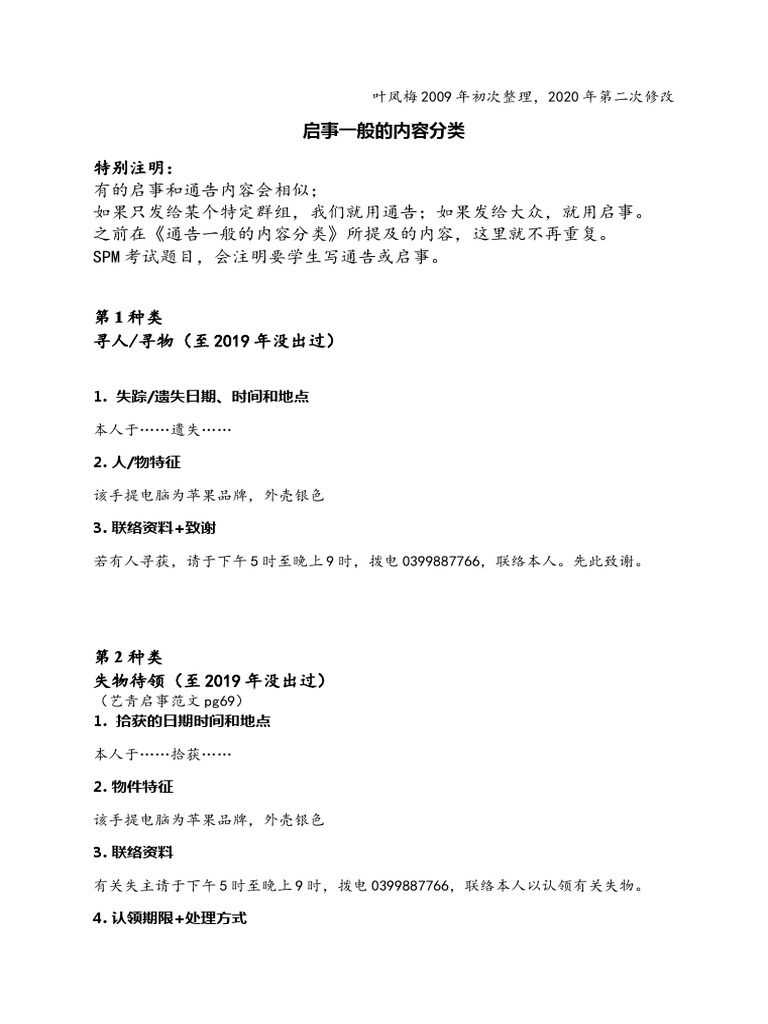

'ot AG 2009 F Anck KIB, 2020 FH AK AHL\nBE -RHARDR\nAAA:\nRABE MBSA AM;\nHRA RBENMER HM, MNRAS: RARBKA, MABF.\nLWA GHS—-MHARDAR) FRAWAS, RPRRAHL.\nSPMFAMA, SRWRFA SUSAR SF.\nBLK\nBAH (£2019 FR it)\n1. EERE, AYA\nFAP iene\n2. APOE\nEF REMAPR SMe, SARS\n3, RSS + BN\nSHAFKR, HF FFSMERLEI OH, AL 0399887766, MAA. As Hilt.\nLARK\nRAGA CZ 2019 Fh st)\n(ERB BK pe69)\n1. JS3RATELMBATEDADIE AR\nBA Feveeedb Bese\n2. YES\nFROME M, TRS\n3. PRISER\nRKREHT EFS MERLE AY, AY 0399887766, KAKRAVIMA K KAD.\n4. SATB + SERBS =b\n\x0c'

In [15]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

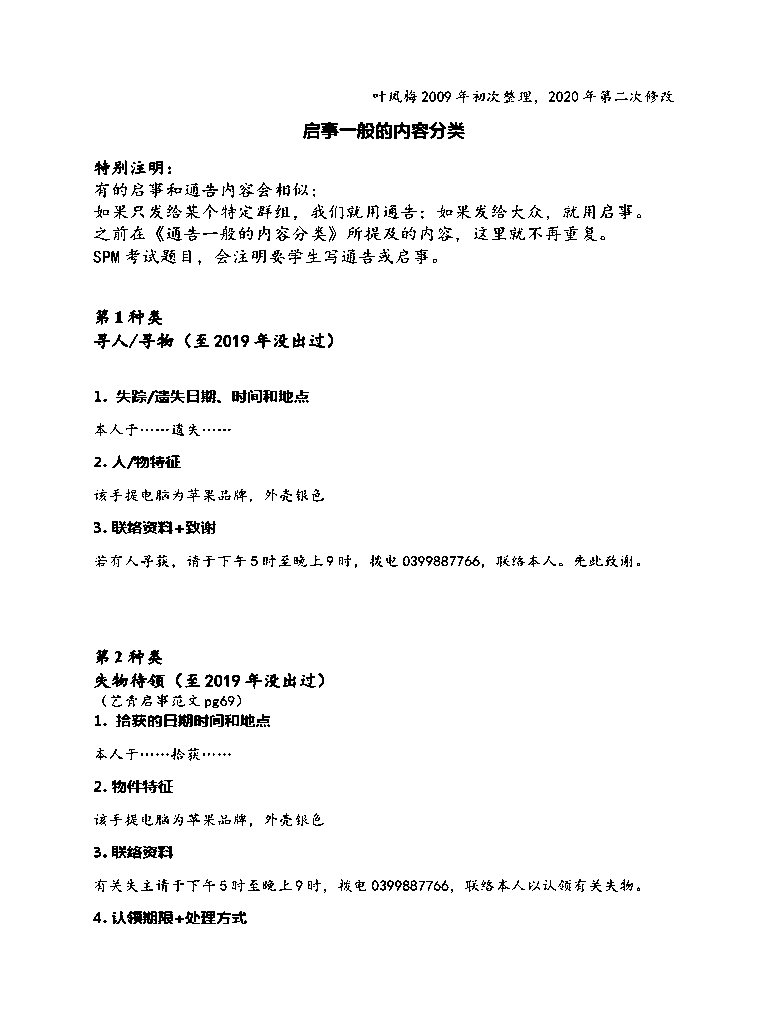

'ot 18,49 2009 4 pack MIB, 2020 4 Hk ARAL\nBS—-ROASSR\nMANE:\nHBS RHSNSS WH;\nSORA RENE BL, AAI S: RRBKG, MARS.\nLATA GHE-MMASPA) HRAWAS, EPUMPAER.\nSPMAREA, SEWLSE EMSRS.\nRAR\nBASH 4a (£2019 FR et)\n1. ARAB, BSEFUIE\nBAP eceellf Ronee\n2. AAO E\nHEREMARR ME, HEME\n3. REL + BS\nSTALK, APPS SP ZREIM AH, Me 0399887766, MAA. Keb Ail.\nRLMRK\nKARR CZ 2019 Fe st)\n(ERB FRE p—69)\n1. JSERRIEMAAS DADE\nBA Fssedie peers\n2. HOHE\nEER PR tei, IRE\n3, RRSBEEY\nHARRAH ETSY EMEA, HE 0399887706, HI KALIMM A KKH,\n4 SAMAR SHEEP\n\x0c'

In [16]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

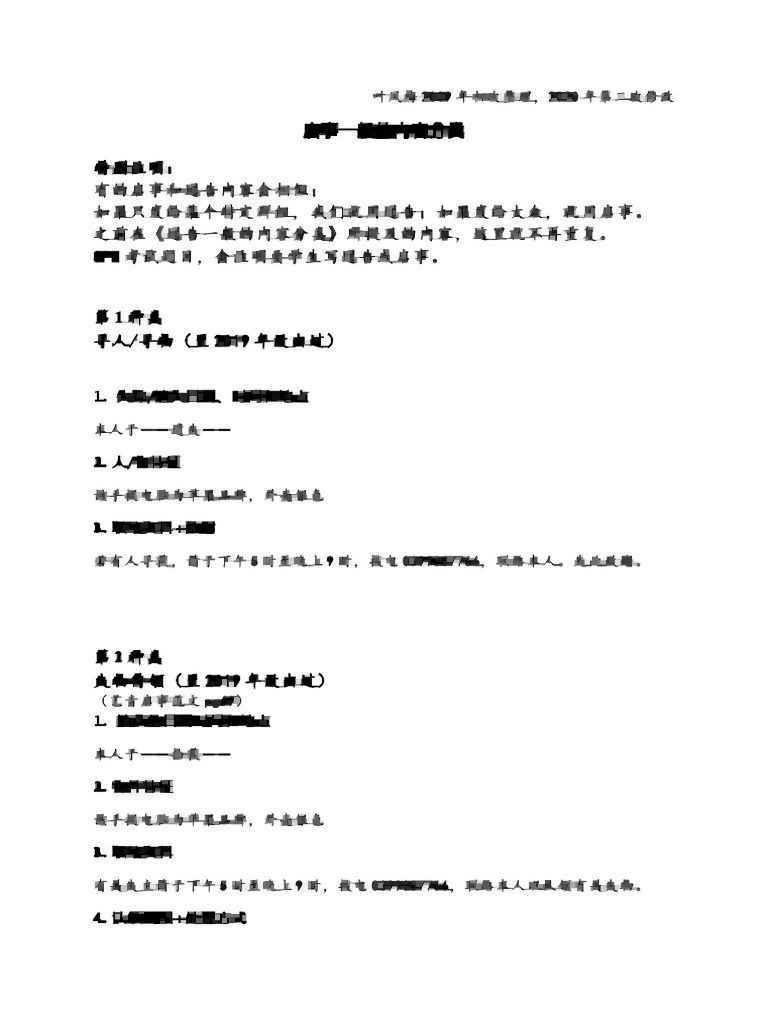

'A a ek at, = a Brat\neet\nnee,\n1k i A ee,\nPARSER ee, A Pe, A E.\noA C—O ATH A) A,\nUTR A, HRA.\nwith\nPA/Pa CE Bre 4 at)\nL a Nal\nAAT\n2 Ai\nPe,\n1\nPeAFR OTTO eee, AO, ee. dee.\nB1th\nlet CE mere 4 at)\nCCPL pe)\nL el\naA ton\n2\nSte,\n1\nRAGE 6 a 9, RT, a A,\nad\n\x0c'

In [17]:
img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

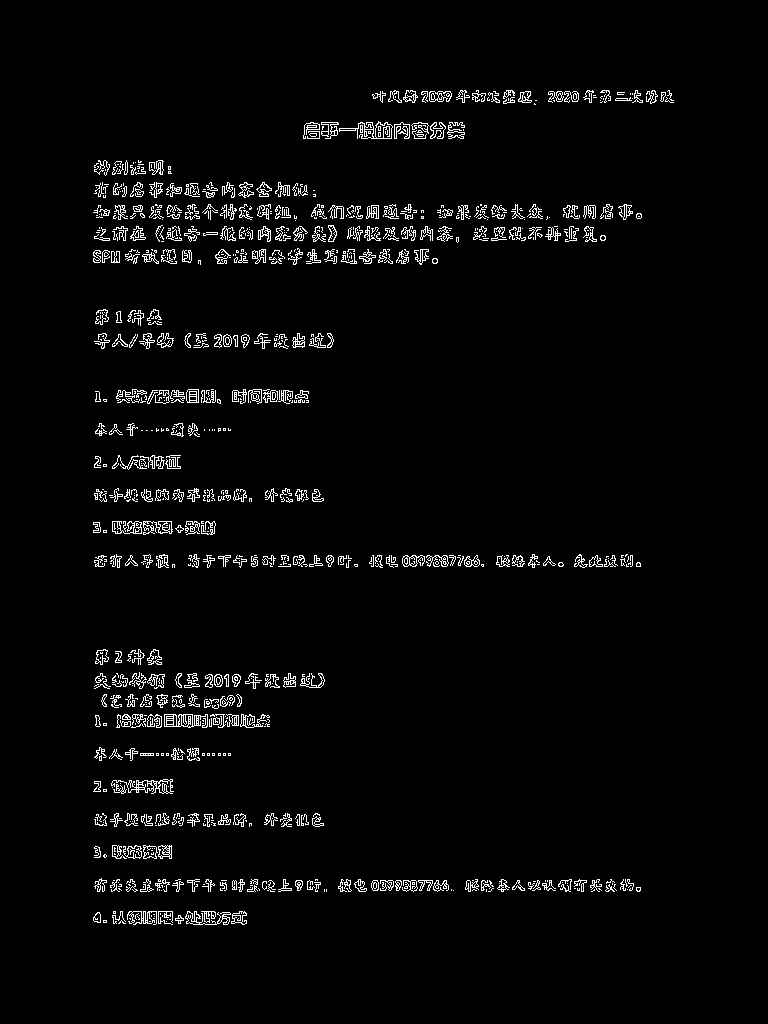

'are SR rte aon er eee a aim\naE -ENaees\nee\nree\nCt ee ee ore ae\nee Ce ees\nee ee eee oo\noe\nNe Ree Oras To)\nPee\nBA md toon\newes\nre eC eas eno\nEe]\nSee OM aa eee he SCLC CML Oe\nCre\neae eet)\neos ee on\nre\nee\need\npee gL ecm ace\nRc)\nPee eee ee a me eC eer Me oe eae Seed\nEonar nad\n\x0c'

In [18]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

## keys

Extract data from an image and get a text box

In [19]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/1726978389?v=1')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


## Getting boxes around text

Draw a border around the text

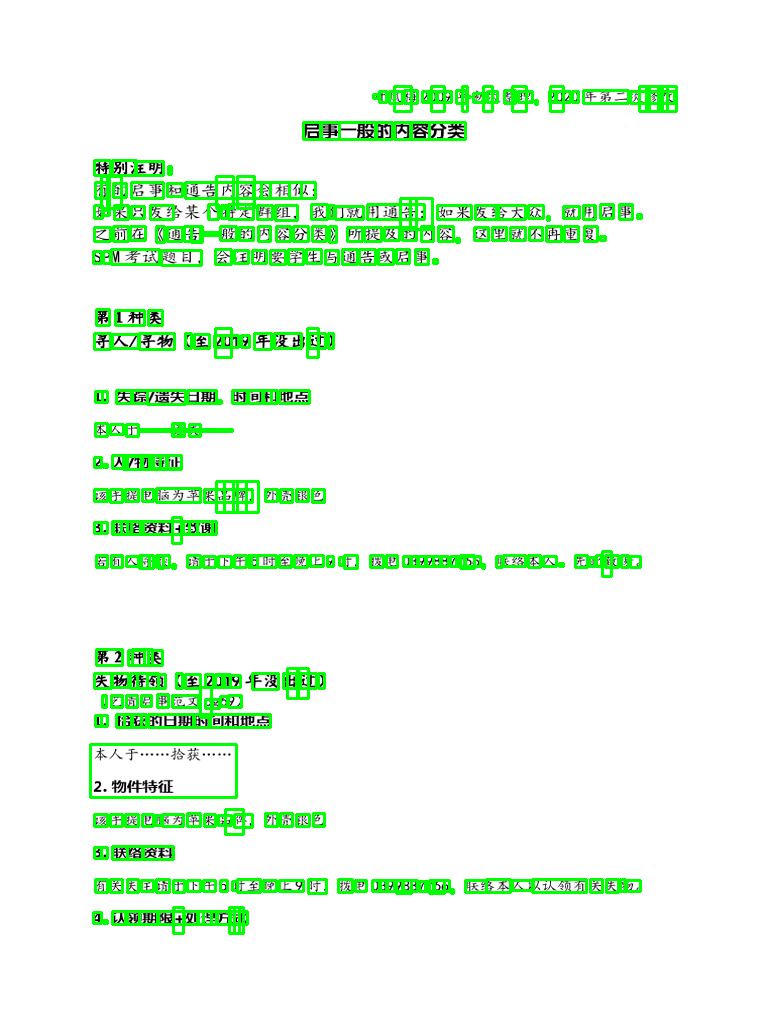

-1

In [20]:
import cv2
import pytesseract

img = cv2.imread('/content/1726978389?v=1')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) #Get text box
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)


## Getting boxes around text words

Drawing borders around words

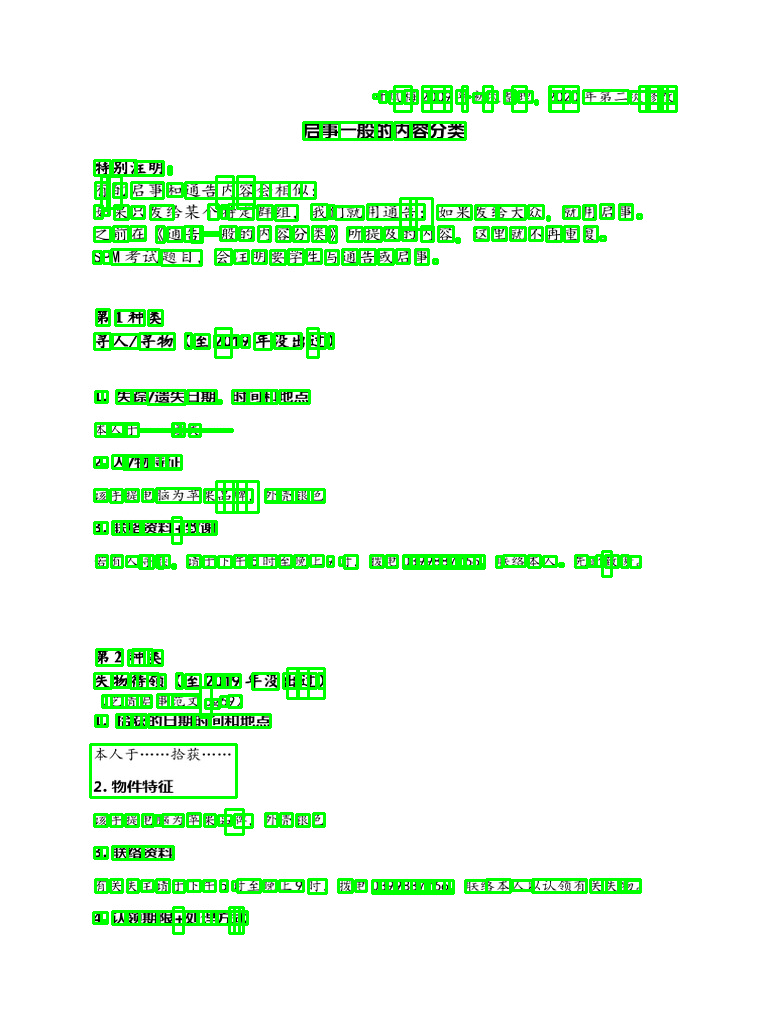

-1

In [21]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


## Text template matching

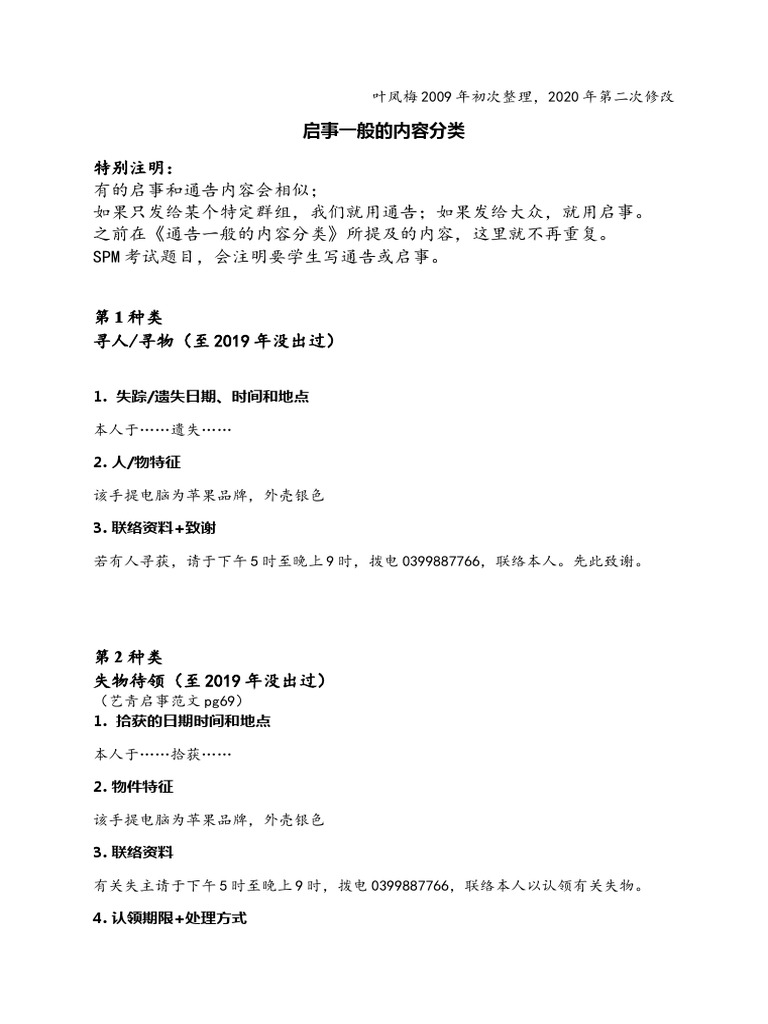

-1

In [22]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/1726978389?v=1')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])[-/.](0[1-9]|1[012])[-/.](19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)

## Custom detection, only numbers

In [23]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))


2009-2020-
-
.
-.
.
42019-
1.
2.
34
0399887766-..
2019-
69
1.23
2.
3.
50399887766.
4.5



## Blacklisting characters

In [24]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)


'ot AG  F Anck KIB, FH AK AHL\nBE -RHARDR\nAAA:\nRABE MBSA AM;\nHRA RBENMER HM, MNRAS: RARBKA, MABF.\nLWA GHS—-MHARDAR) FRAWAS, RPRRAHL.\nSPMFAMA, SRWRFA SUSAR SF.\nBLK\nBAH CZ FR it)\nl. EERE, AYA\nFAP iene\n. APOE\nEF REMAPR SMe, SARS\nBROS + BN\nSHAFKR, HF FFSMERLEI OH, AL OIBTT, MAA. As Hilt.\nLARK\nRAGA CZ Fh st)\n(ERB BK peoo)\nL. JSSRATELMBATEDADIE AR\nBA Feveeedb Bese\n. YES\nFROME M, TRS\n. PRISER\nRKREHT EFS MERLE AY, AY IB, KAKRAVIMA K KAD.\nSATB + SERBS =b\n\x0c'

## Select language

In [25]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [26]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'ot AG 2009 F Anck KIB, 2020 FH AK AHL\nBE -RHARDR\nAAA:\nRABE MBSA AM;\nHRA RBENMER HM, MNRAS: RARBKA, MABF.\nLWA GHS—-MHARDAR) FRAWAS, RPRRAHL.\nSPMFAMA, SRWRFA SUSAR SF.\nBLK\nBAH (£2019 FR it)\n1. EERE, AYA\nFAP iene\n2. APOE\nEF REMAPR SMe, SARS\n3, RSS + BN\nSHAFKR, HF FFSMERLEI OH, AL 0399887766, MAA. As Hilt.\nLARK\nRAGA CZ 2019 Fh st)\n(ERB BK pe69)\n1. JS3RATELMBATEDADIE AR\nBA Feveeedb Bese\n2. YES\nFROME M, TRS\n3. PRISER\nRKREHT EFS MERLE AY, AY 0399887766, KAKRAVIMA K KAD.\n4. SATB + SERBS =b\n\x0c'

## Detection in multiple languages

In [27]:
!sudo apt-get install tesseract-ocr-grc
!sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-grc
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 916 kB of archives.
After this operation, 2,261 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-grc all 1:4.00~git30-7274cfa-1.1 [916 kB]
Fetched 916 kB in 1s (1,147 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-grc.
(Reading data

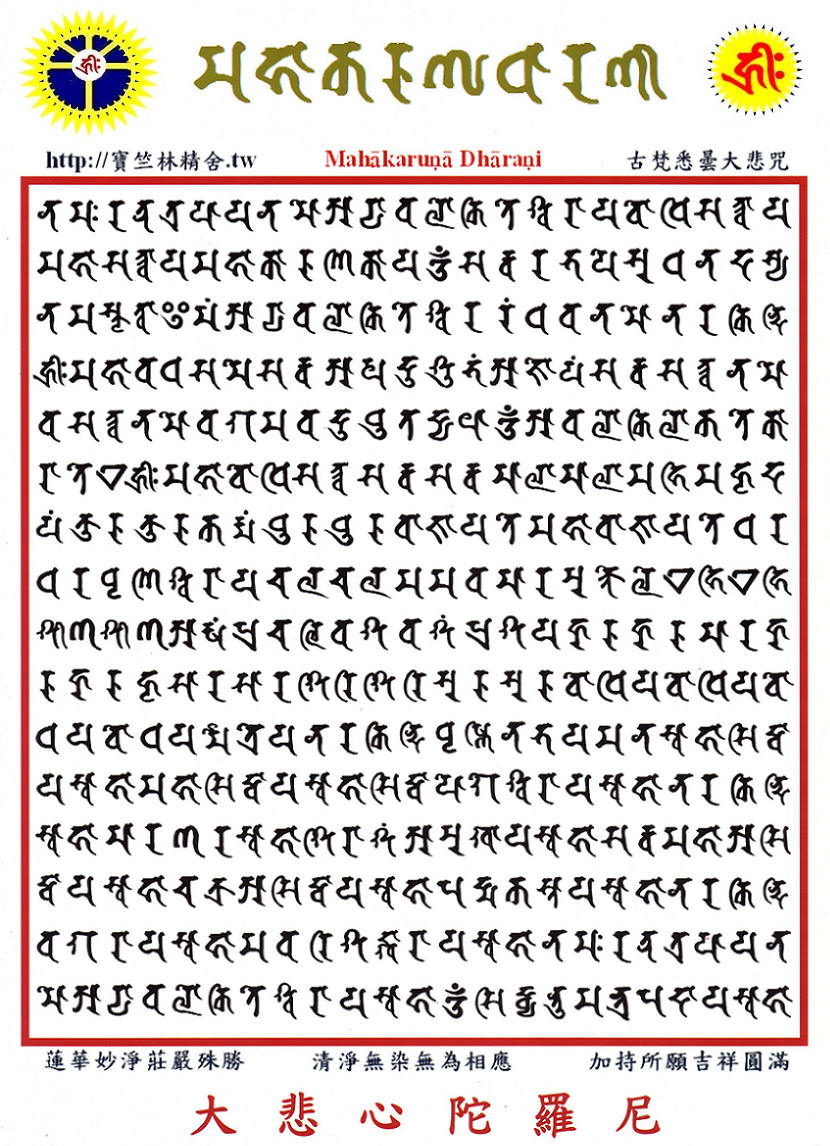

'ม ส ส โณ ๕ ร ก BE\n1 บะ // ห “AHA S.tw Mahakaruna Dharani FRA EARR\nTULL TLERAT HAT CLA TY TARGATA\nYHRATAHRA EMRKAFH ETRAL I TLS\nTHATOHLA GTI LAT ALTA ITH T LAG\nAU AIC HHH E HY ESAHTAK EN TAH\nTATTHITH LES TEL FHT CALA TAH\nธร ชง อม «๕ ศศ ส ส ุ ย อ สุข ส ส มุ ๕ ม ุ ๕ ม ุ 24%\nἐιξεξεδῖθες9 ἐξ ξ ει Ὑσίξ 7641\n4140 ๓ จ ธ ข ๆ 4 ๕ ส 4 จ ส ม ุ ม ศุ ม ร 4 ส 797\nฆ ๆ ฤ ณ (อ ย จ @ ฒ ส ุ ภ ศ ุ ภู ส ชู ก ภ ข ธร ม ร ู กิ\nERE RAT ELC TA EA ETOHATAAT\n«ἀξ αςκηπεχτας σὰ 1 σι ἀπ Κις\nม ภ ๆ ซ สม %@ ๕ สุ ข ซ %@ ๕ ส ร 1 ส ει ἐξέ ατας\nERAT M LERCH THAME RA FLRAA\nTH ERT FHA TA ERY FARIA EAT THE\nTAT THERA T THRE TERT HTL GAA T\nHAE THE 4 THERE GH FI UG ACAER\n% Bib i$ A A it BS Ὁ 6 ἃ dro AS Pe BE AE δὰ\nKes & BR\n\x0c'

In [28]:
img = cv2.imread('/content/1.sans6.jpg')
cv2_imshow(img)
# Adding custom options
custom_config = r'-l grc+tha+eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

## Language detection

In [29]:
!pip -q install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [30]:
custom_config = r'-l grc+tha+eng --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

[th:0.9999983066671699]

## Script, run in loop for read pages

In [32]:
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()



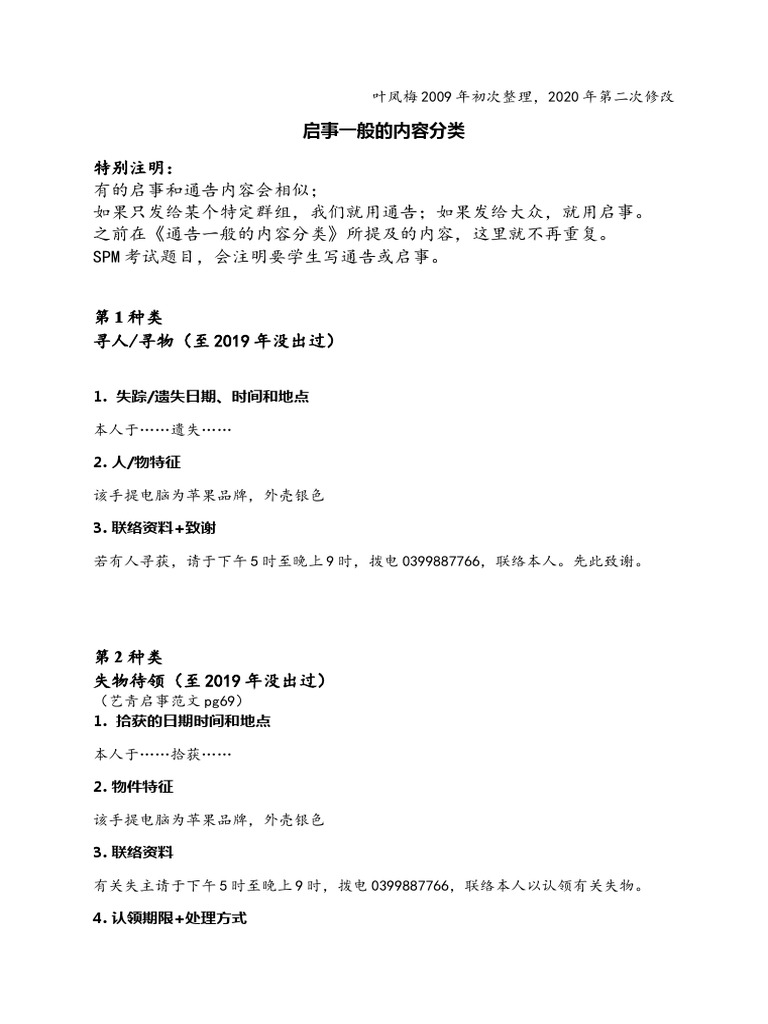



PAE 2009 4F A02k AE IE, 2020 AFH IK AL



BERNARDS



SPMFAMA, SRWRFA SUSAR SF.

Li GIS-MOASTR) HRAWAS, APRPALL.

HORAK SRM, BALE: toRKREKA, MABE



RABE MBSA AM;



AEA:



sat)



 



FA/FH% (22019

HLARK



1. AASB, BEAMS



 



2. APOE



BFREMAERAM, $HRRE



3. ARERR + Bi



BRAFTKR, HT FFSMZRLEIM, IL 0399887766, KAA. Asif.



1. JRA MAES



(ERR FTL peo)

RMR (EZ 2019 Rit)



RAK



 



2. DPS tE



KFREMAF RDM, HHRE



3. ARR



HRREHF ETS MERE, Re 0399887766, RAAT KAA.



4. AGUA + WEES St





 





 



She Bib i$ A A it BS Bia dro AS Pe BE AE



HHS LTR FLARES H FF UFACAR

TA TAKA T CAKE AEA H TALE T

FEAT EH TA ERY HA FALE LAG

HEHT M LEROTA HAMEL ETH TYTHA

HE RHRH EE ERAT AMAL KAT L RE

A RAAURALT LHS IHTKANTHAAT

ERE SATA LOCA CA FA EAOATGAL

AMA NHEY TELA TAY HAL EL ERTS

ALI MATYLALA UY THE TARA TATE

APL SEARLS ES FAKAT HACKY TL

ETPRHATGA TH EH EKOHEAH ELAS

THETH IML LES TFLEHTLRTA TA

AURIG HHA E HY EGRHRTAH EH TL

FHATSHAS ILE TAL TA TAH

In [34]:
image = cv2.imread("/content/1726978389?v=1")
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()